## Description
The aim of this Jupyter Notebook is to examine the potential profitability derived from trading two financial instruments, X and Y, when the prices diverge by a certain threshold.

#### Objectives include:
- Data Exploration
- Pricing Relationships
- Trading Strategy

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Read Data
We will first check for missing values within the dataset.

In [3]:
df = pd.read_csv("data.csv", header=0)
missing_values = df.isnull()
missing_count = missing_values.sum()
print(missing_count)

Time         0
X_BID        0
X_BID_VOL    0
X_ASK        0
X_ASK_VOL    0
Y_BID        0
Y_BID_VOL    0
Y_ASK        0
Y_ASK_VOL    0
dtype: int64


In [4]:
df

,Time,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL
0,2019-11-18 08:00:00,106340.0,15.0,106348.0,11.0,105200.0,9.0,105210.0,19.0
1,2019-11-18 08:00:10,106312.0,6.0,106320.0,9.0,105180.0,5.0,105190.0,13.0
2,2019-11-18 08:00:20,106312.0,7.0,106320.0,12.0,105170.0,32.0,105180.0,1.0
3,2019-11-18 08:00:30,106336.0,22.0,106340.0,1.0,105190.0,10.0,105200.0,19.0
4,2019-11-18 08:00:40,106352.0,2.0,106356.0,4.0,105200.0,29.0,105220.0,24.0
...,...,...,...,...,...,...,...,...,...
737734,2020-12-31 09:59:20,109140.0,2.0,109144.0,1.0,107190.0,6.0,107210.0,1.0
737735,2020-12-31 09:59:30,109144.0,1.0,109168.0,21.0,107170.0,1.0,107200.0,1.0
737736,2020-12-31 09:59:40,109120.0,4.0,109144.0,1.0,107170.0,3.0,107230.0,3.0
737737,2020-12-31 09:59:50,109092.0,2.0,109104.0,5.0,107180.0,3.0,107220.0,5.0


In [5]:
df["Time"]

0         2019-11-18 08:00:00
1         2019-11-18 08:00:10
2         2019-11-18 08:00:20
3         2019-11-18 08:00:30
4         2019-11-18 08:00:40
                 ...         
737734    2020-12-31 09:59:20
737735    2020-12-31 09:59:30
737736    2020-12-31 09:59:40
737737    2020-12-31 09:59:50
737738    2020-12-31 10:00:00
Name: Time, Length: 737739, dtype: object

## Change Dataframe
Since we are looking at two time series (the two financial instruments X and Y), we will make the "Time" column within the dataframe a datetime object instead of a regular object. In addition, we will set the index of each observation to be the "Time". This will help with visualisations later.

In [6]:
df["Time"] = pd.to_datetime(df["Time"])
df.set_index("Time", inplace=True)

In [7]:
df

,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL
Time,,,,,,,,
2019-11-18 08:00:00,106340.0,15.0,106348.0,11.0,105200.0,9.0,105210.0,19.0
2019-11-18 08:00:10,106312.0,6.0,106320.0,9.0,105180.0,5.0,105190.0,13.0
2019-11-18 08:00:20,106312.0,7.0,106320.0,12.0,105170.0,32.0,105180.0,1.0
2019-11-18 08:00:30,106336.0,22.0,106340.0,1.0,105190.0,10.0,105200.0,19.0
2019-11-18 08:00:40,106352.0,2.0,106356.0,4.0,105200.0,29.0,105220.0,24.0
...,...,...,...,...,...,...,...,...
2020-12-31 09:59:20,109140.0,2.0,109144.0,1.0,107190.0,6.0,107210.0,1.0
2020-12-31 09:59:30,109144.0,1.0,109168.0,21.0,107170.0,1.0,107200.0,1.0
2020-12-31 09:59:40,109120.0,4.0,109144.0,1.0,107170.0,3.0,107230.0,3.0


# Data Exploration
We notice by looking at the plots below that the price movement of both financial instruments X and Y are quite similar.
There is significantly more bid and ask volume in instrument X compared to instrument Y. This suggests that instrument X has higher liquidity than instrument Y due to a greater number of buyers and sellers. With greater liquidity, buyers and sellers have a greater chance to purchase/sell a financial instrument at their desired price without significant price fluctuations. Apart from this, there seems to be no anomalies yet; the bid/ask price plot for both instruments seem to fluctuate around a mean. Further testing is required to determine if there are any seasonal/periodic pattern.

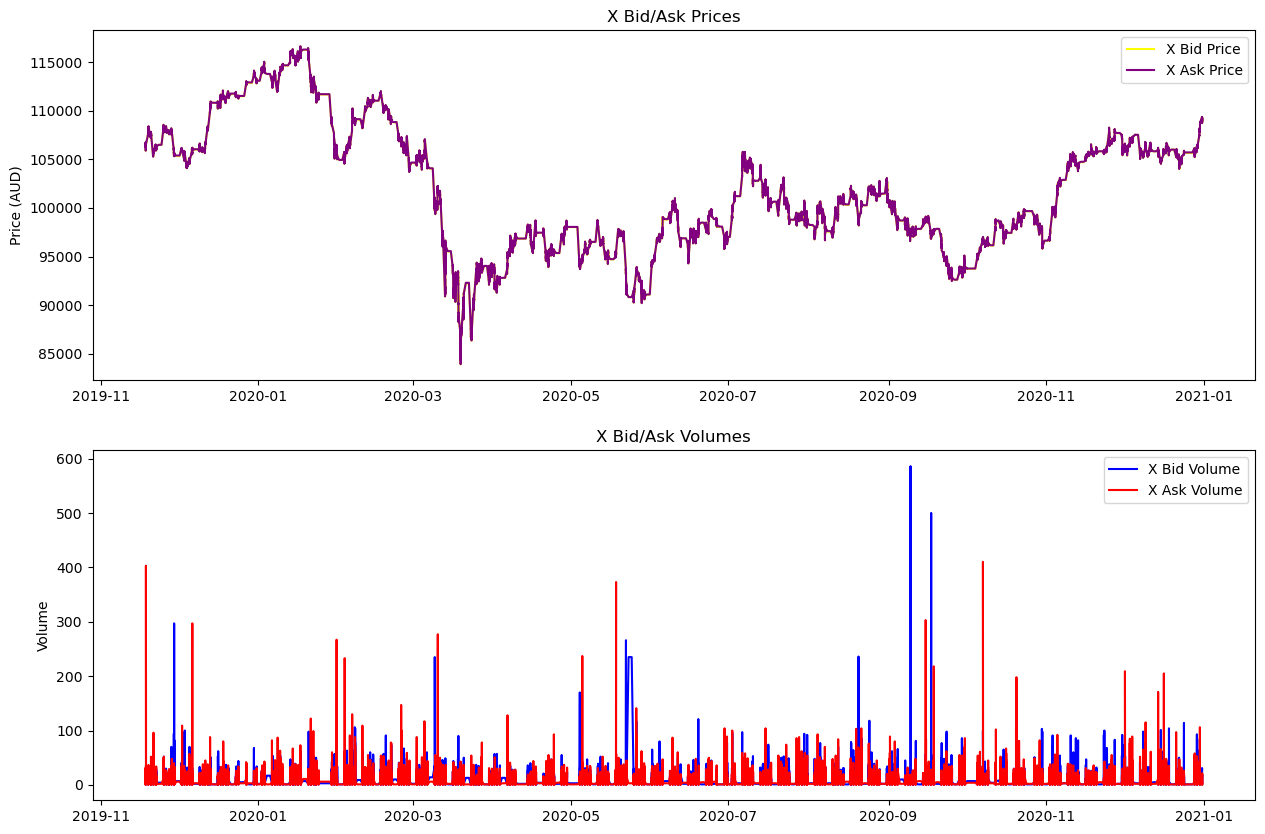

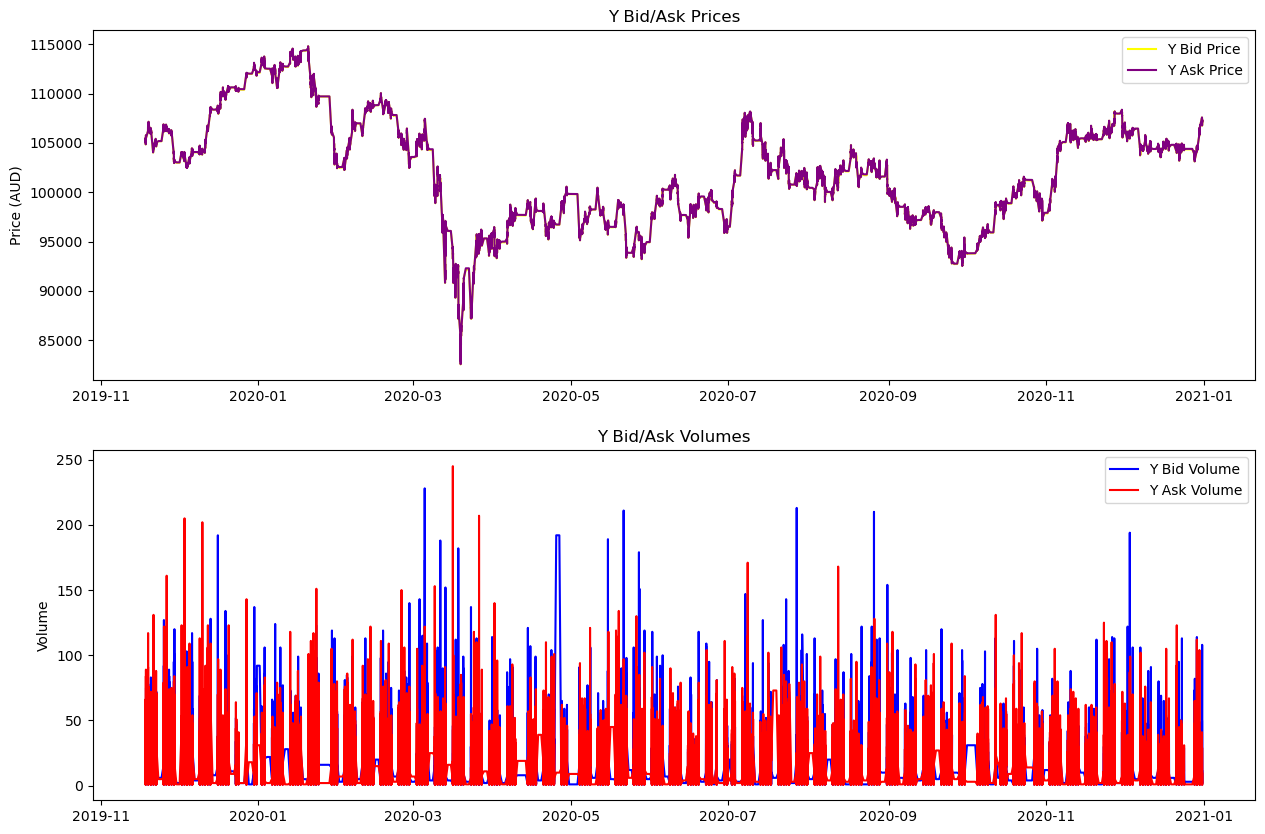

In [8]:
# Plot Financial Instrument X
plt.figure(figsize=(15, 10))

# Plot X Bid/Ask Prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df["X_BID"], label="X Bid Price", color="yellow")
plt.plot(df.index, df["X_ASK"], label="X Ask Price", color="purple")
plt.ylabel("Price (AUD)")
plt.title("X Bid/Ask Prices")
plt.legend()

# Plot X stock bid volumes
plt.subplot(2, 1, 2)
plt.plot(df.index, df["X_BID_VOL"], label="X Bid Volume", color="blue")
plt.plot(df.index, df["X_ASK_VOL"], label="X Ask Volume", color="red")
plt.ylabel("Volume")
plt.title("X Bid/Ask Volumes")
plt.legend()

plt.show()

# Plot Financial Instrument Y
plt.figure(figsize=(15, 10))

# Plot Y Bid/Ask Prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df["Y_BID"], label="Y Bid Price", color="yellow")
plt.plot(df.index, df["Y_ASK"], label="Y Ask Price", color="purple")
plt.ylabel("Price (AUD)")
plt.title("Y Bid/Ask Prices")
plt.legend()

# Plot Y Bid/Ask Volumes
plt.subplot(2, 1, 2)
plt.plot(df.index, df["Y_BID_VOL"], label="Y Bid Volume", color="blue")
plt.plot(df.index, df["Y_ASK_VOL"], label="Y Ask Volume", color="red")
plt.ylabel("Volume")
plt.title("Y Bid/Ask Volumes")
plt.legend()

plt.show()

## Add Weighted Price
The rationale behind the addition of weighted prices for both instruments is to take into account both the price and the volume within the dataset. It would not make sense to weigh a bid ask pair, one with lots of volume and the other not a lot, the same. The average of the bid and ask price was also an option, though it would be strange to use the average of the prices if one volume exceeded the other by a substantial amount (at 2019-11-18 08:00:30, there is 22 X_BID_VOL and only 1 X_ASK_VOL). As such, the "X_WEIGHTED" and "Y_WEIGHTED" columns of the dataframe include the sum of each price multiplied by their respective volumes, then divided by the total volume at that timestamp.

In [9]:
df["X_WEIGHTED"] = (df["X_BID"] * df["X_BID_VOL"] + df["X_ASK"] * df["X_ASK_VOL"]) / (df["X_BID_VOL"] + df["X_ASK_VOL"])
df["Y_WEIGHTED"] = (df["Y_BID"] * df["Y_BID_VOL"] + df["Y_ASK"] * df["Y_ASK_VOL"]) / (df["Y_BID_VOL"] + df["Y_ASK_VOL"])

x_data = df["X_WEIGHTED"].values
y_data = df["Y_WEIGHTED"].values

In [10]:
df

,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL,X_WEIGHTED,Y_WEIGHTED
Time,,,,,,,,,,
2019-11-18 08:00:00,106340.0,15.0,106348.0,11.0,105200.0,9.0,105210.0,19.0,106343.384615,105206.785714
2019-11-18 08:00:10,106312.0,6.0,106320.0,9.0,105180.0,5.0,105190.0,13.0,106316.800000,105187.222222
2019-11-18 08:00:20,106312.0,7.0,106320.0,12.0,105170.0,32.0,105180.0,1.0,106317.052632,105170.303030
2019-11-18 08:00:30,106336.0,22.0,106340.0,1.0,105190.0,10.0,105200.0,19.0,106336.173913,105196.551724
2019-11-18 08:00:40,106352.0,2.0,106356.0,4.0,105200.0,29.0,105220.0,24.0,106354.666667,105209.056604
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 09:59:20,109140.0,2.0,109144.0,1.0,107190.0,6.0,107210.0,1.0,109141.333333,107192.857143
2020-12-31 09:59:30,109144.0,1.0,109168.0,21.0,107170.0,1.0,107200.0,1.0,109166.909091,107185.000000
2020-12-31 09:59:40,109120.0,4.0,109144.0,1.0,107170.0,3.0,107230.0,3.0,109124.800000,107200.000000


## Add Weighted Dataframe
We will create a new dataframe that includes the weighted prices for X and Y.

In [11]:
weighted_df = df.iloc[:, -2:]
weighted_df

,X_WEIGHTED,Y_WEIGHTED
Time,,
2019-11-18 08:00:00,106343.384615,105206.785714
2019-11-18 08:00:10,106316.800000,105187.222222
2019-11-18 08:00:20,106317.052632,105170.303030
2019-11-18 08:00:30,106336.173913,105196.551724
2019-11-18 08:00:40,106354.666667,105209.056604
...,...,...
2020-12-31 09:59:20,109141.333333,107192.857143
2020-12-31 09:59:30,109166.909091,107185.000000
2020-12-31 09:59:40,109124.800000,107200.000000


## Weighted Price Plot
The historical weighted price of financial instruments X and Y are quite similar from 18/11/2019 to 31/12/2020 (the time period of the dataset given). However, we see some deviation in the prices, some small and some large. If we can prove that there is a long-term relationship between X and Y, we can potentially make money by identifying the points of divergence, making a trade, and selling the instrument when the prices converge. However, there are tests that must be conducted before we take advantage of this phenomenon.

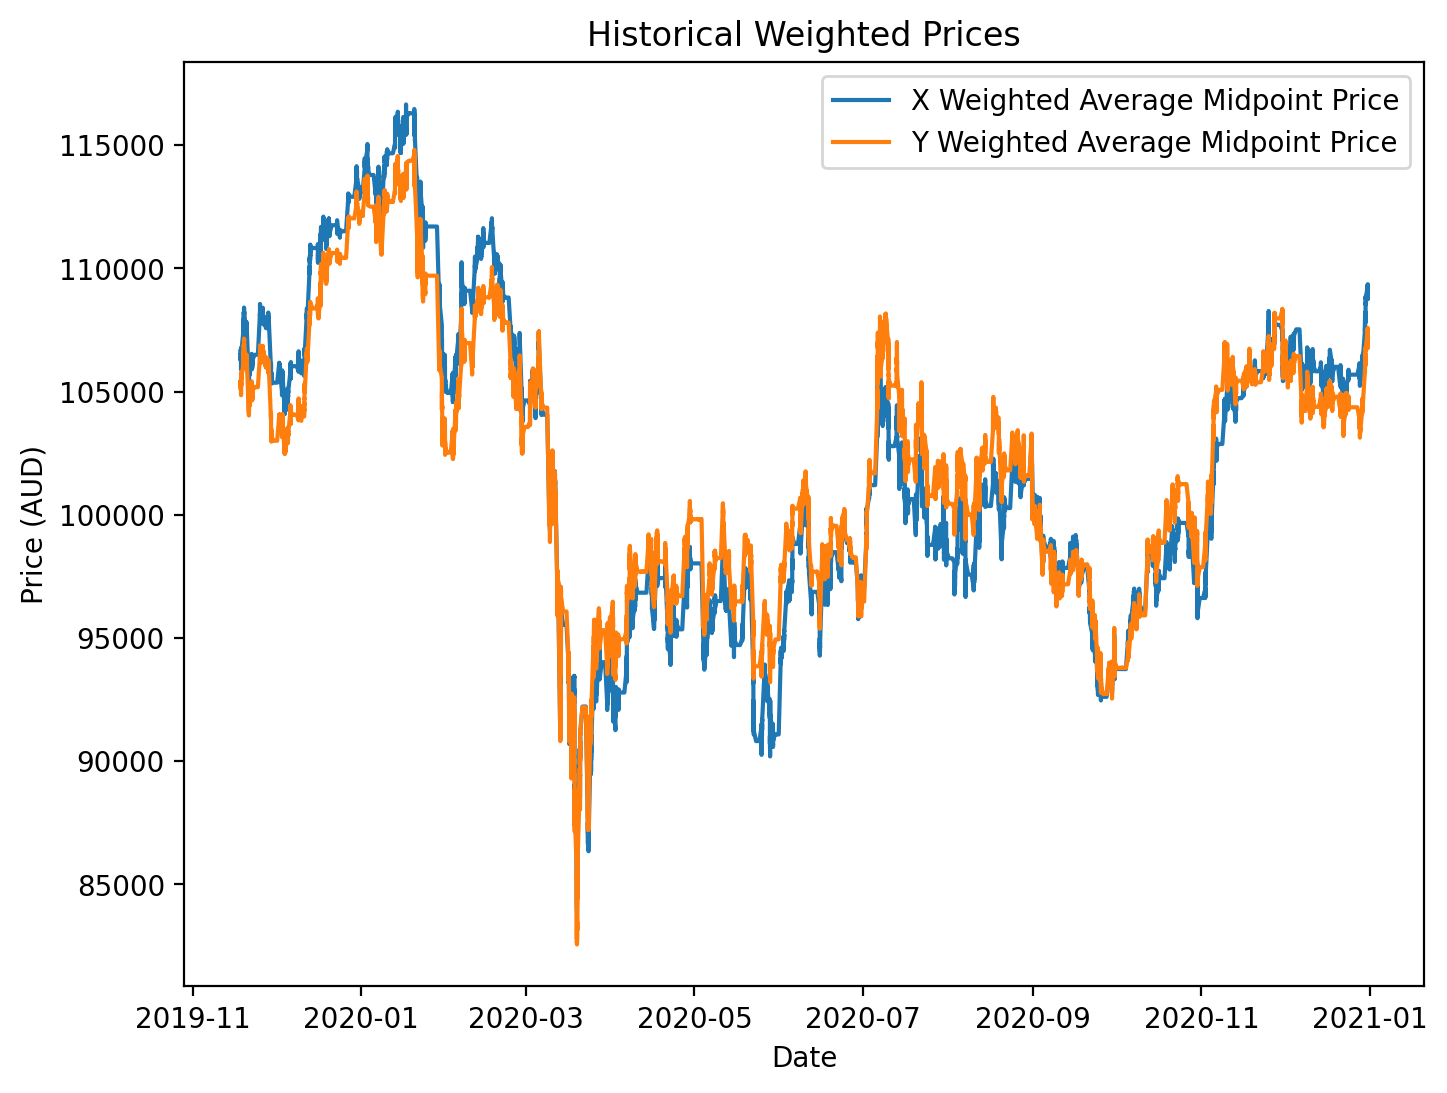

In [12]:
figure(figsize=(8, 6), dpi=200)
X = weighted_df["X_WEIGHTED"]
Y = weighted_df["Y_WEIGHTED"]
plt.plot(X, label = "X Weighted Average Midpoint Price")
plt.plot(Y, label = "Y Weighted Average Midpoint Price")
plt.xlabel("Date")
plt.ylabel("Price (AUD)")
plt.title("Historical Weighted Prices")
plt.legend()

## Seasonalilty Check

Below we check the decomposition of the weighted X and Y values. We notice that there is no particular pattern in the trend plot except for the fact it fluctuates around some mean value. There doesn't seem to be any seasonality as the seasonality plot is just at 0. Lastly, there are no patterns in the residual plot which suggests there are only random variation/noise in the residuals. It makes sense that these are included in the residuals as they do not contribute to the trend or seasonal components of this test.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

X_decomposition = seasonal_decompose(weighted_df["X_WEIGHTED"], model="additive", period=7)
Y_decomposition = seasonal_decompose(weighted_df["Y_WEIGHTED"], model="additive", period=7)

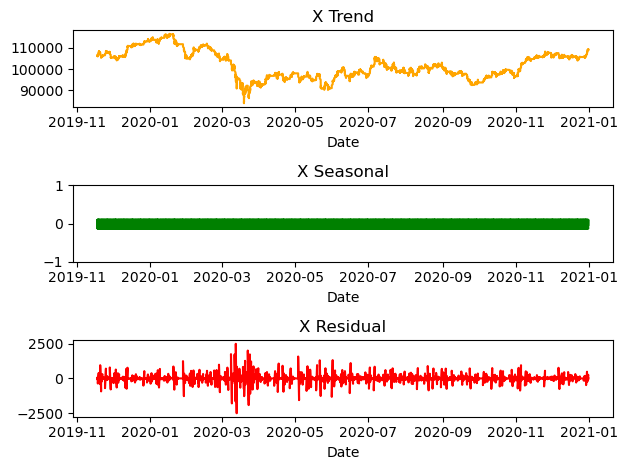

In [14]:
# X Trend
plt.subplot(3, 1, 1)
plt.plot(df.index, X_decomposition.trend, label="Trend", color="orange")
plt.title("X Trend")
plt.xlabel("Date")

# X Seasonal
plt.subplot(3, 1, 2)
plt.plot(df.index, X_decomposition.seasonal, label="Seasonal", color="green")
plt.ylim(-1, 1)
plt.title("X Seasonal")
plt.xlabel("Date")

# X Residual
plt.subplot(3, 1, 3)
plt.plot(df.index, X_decomposition.resid, label="Residual", color="red")
plt.title("X Residual")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

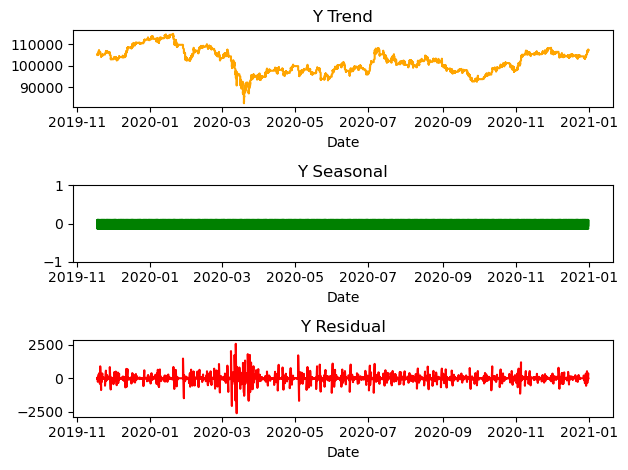

In [15]:
# Y Trend
plt.subplot(3, 1, 1)
plt.plot(df.index, Y_decomposition.trend, label="Trend", color="orange")
plt.title("Y Trend")
plt.xlabel("Date")

# Y Seasonal
plt.subplot(3, 1, 2)
plt.plot(df.index, Y_decomposition.seasonal, label="Seasonal", color="green")
plt.ylim(-1, 1)
plt.title("Y Seasonal")
plt.xlabel("Date")

# Y Residual
plt.subplot(3, 1, 3)
plt.plot(df.index, Y_decomposition.resid, label="Residual", color="red")
plt.title("Y Residual")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

## Correlation
To test for correlation, we will first compute the pearson correlation matrix using the weighted prices of both instruments. This correlation was used as it measures how two time series vary over time and indicates linear relationships in an easy to interpret manner. Given that the dataset contains 737,739 observations, we assume that the time series dataset follows a normal distribution. This assumption is supported by the Central Limit Theorem (CLT), which asserts that the distribution of the average of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution of the variables. Considering the substantial size of this dataset, it is reasonable to apply the CLT and assume normality for the distribution of bid-ask prices and volumes.

In [16]:
correlation_matrix = np.corrcoef(x_data.T, y_data.T)
print("Pearson correlation matrix:")
print(correlation_matrix)

Pearson correlation matrix:
[[1.         0.97890739]
 [0.97890739 1.        ]]


In [17]:
correlation_XY = correlation_matrix[0, 1]
print("Pearson Correlation Coefficient between financial instruments X and Y:", correlation_XY)

Pearson Correlation Coefficient between financial instruments X and Y: 0.9789073930868696


## Correlation Results
Since the correlation is close to 1 (0.9789), we can say that there is a positive correlation between financial instruments X and Y. However, we must perform more rigorous tests, such as a cointegration test, to determine if there is also a long-term relationship between X and Y.

## Bid Ask Spread
A plot of the difference between the Bid Ask Spread of X compared to Y.

Text(0, 0.5, "Difference between X and Y's Bid Ask Spread")

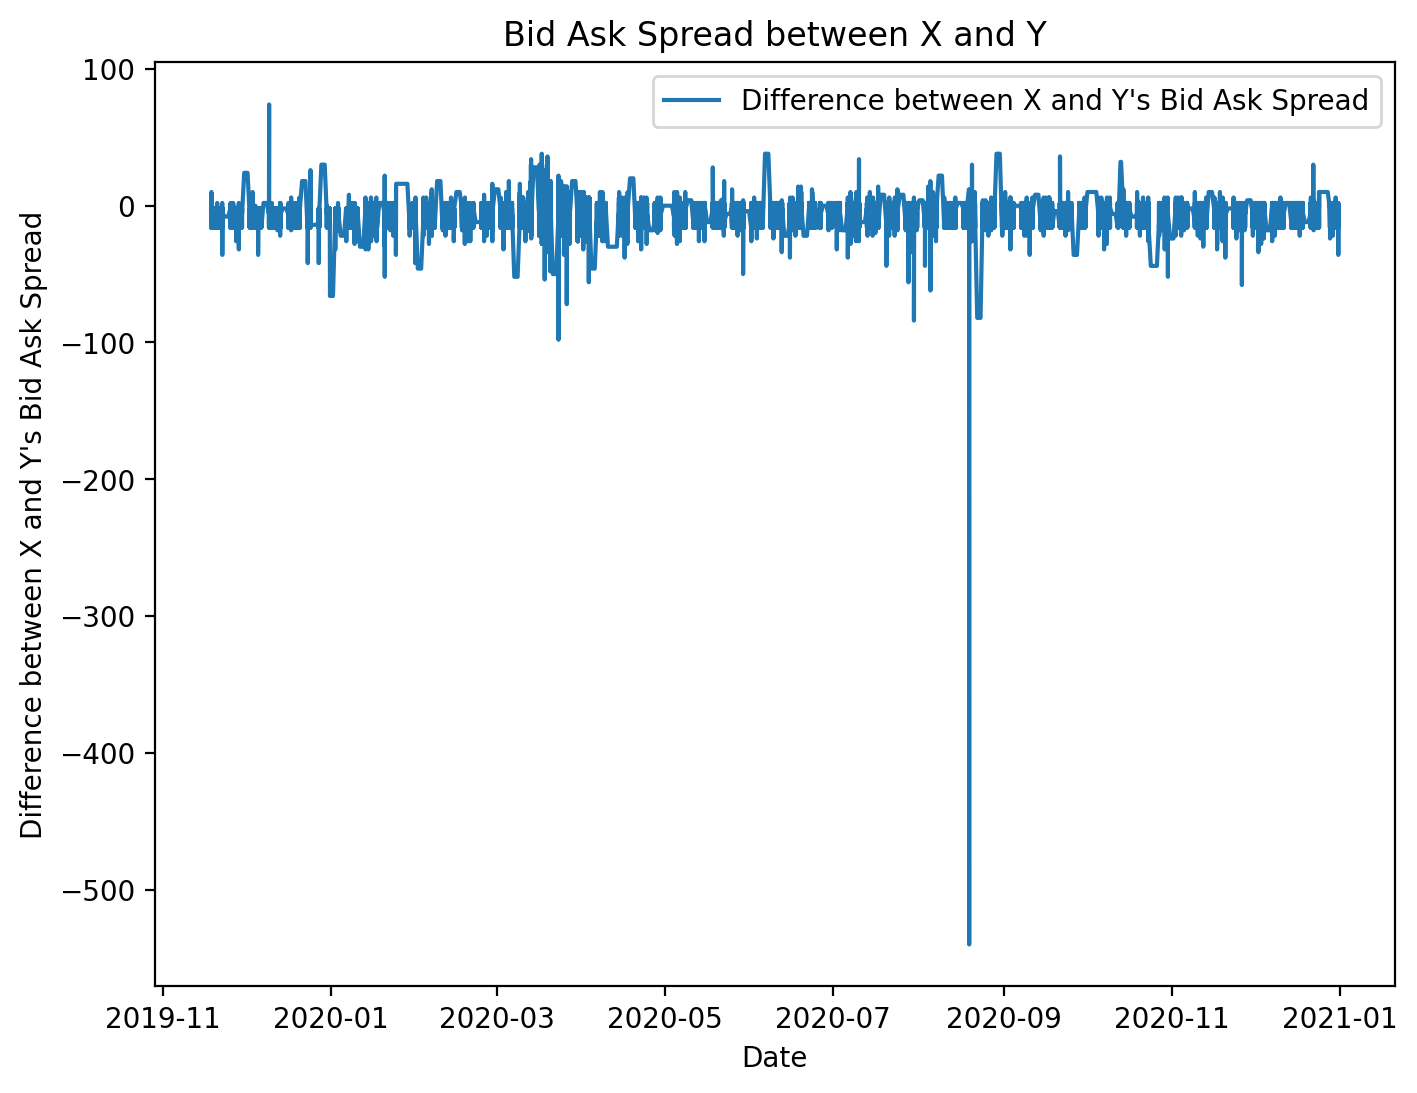

In [18]:
df["X_BID_ASK"] = df["X_ASK"] - df["X_BID"]
df["Y_BID_ASK"] = df["Y_ASK"] - df["Y_BID"]

X_BID_ASK = df["X_BID_ASK"]
Y_BID_ASK = df["Y_BID_ASK"]

figure(figsize=(8, 6), dpi=200)
plt.plot(X_BID_ASK - Y_BID_ASK, label = "Difference between X and Y's Bid Ask Spread")
plt.legend()
plt.title("Bid Ask Spread between X and Y")
plt.xlabel("Date")
plt.ylabel("Difference between X and Y's Bid Ask Spread")

## Outliers
Since the difference between X and Y's Bid Ask Spread is mostly the same, we will assume that the outlier seen in the plot above is due to an error and that the bid ask spread difference only fluctuates within -100 and 100. The median value will be the imputation value for any outliers.

In [19]:
def identify_outliers(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    return df[abs(z_scores) > threshold]

def impute_outliers(df, variable, imputation_value):
    df.loc[df[variable].isin(outliers_df[variable]), variable] = imputation_value

# Remove X_BID_ASK outliers
outliers_df = identify_outliers(df, "X_BID_ASK")
impute_outliers(df, "X_BID_ASK", df["X_BID_ASK"].median())

# Remove Y_BID_ASK outliers
outliers_df = identify_outliers(df, "Y_BID_ASK")
impute_outliers(df, "Y_BID_ASK", df["Y_BID_ASK"].median())

## Bid Ask Spread (After Imputation)
The bid ask spread between X and Y seem to be more reasonable now after imputation.

Text(0, 0.5, "Difference between X and Y's Bid Ask Spread")

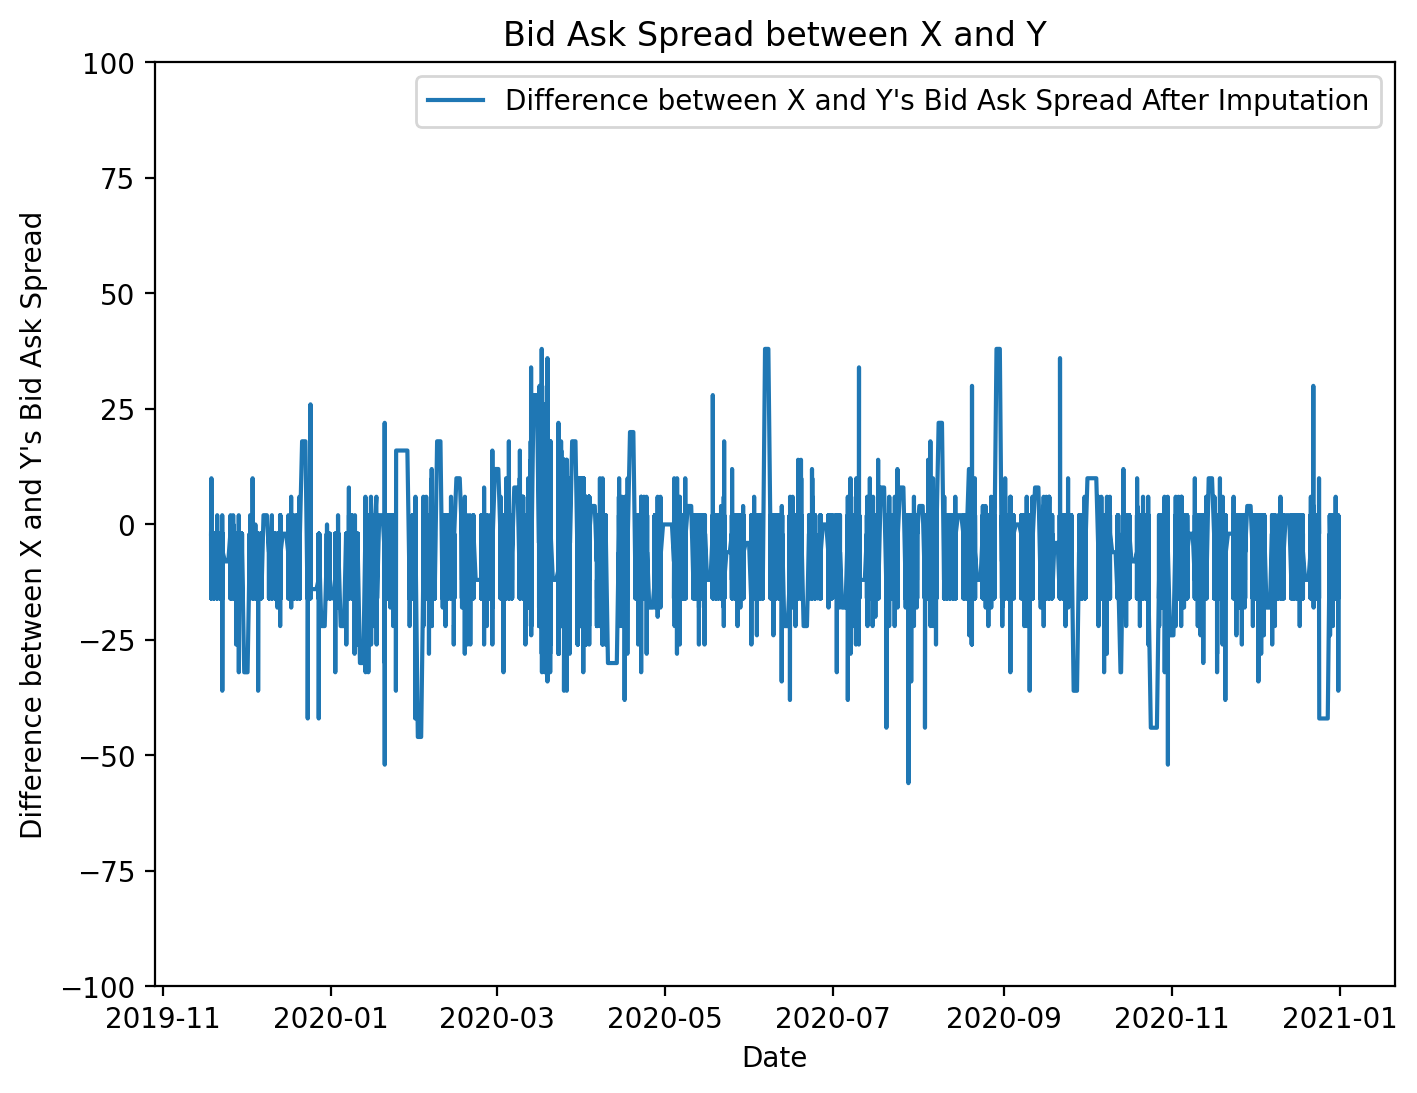

In [20]:
X_BID_ASK = df["X_BID_ASK"]
Y_BID_ASK = df["Y_BID_ASK"]

figure(figsize=(8, 6), dpi=200)
plt.plot(X_BID_ASK - Y_BID_ASK, label = "Difference between X and Y's Bid Ask Spread After Imputation")
plt.ylim(-100, 100)
plt.legend()
plt.title("Bid Ask Spread between X and Y")
plt.xlabel("Date")
plt.ylabel("Difference between X and Y's Bid Ask Spread")

## Stationarity
We must test for stationarity to see if the statistical properties of X and Y change over time. If we can prove stationarity, then we can assume both time series are stable over time and we can also use moving average modelling (important later).

#### Ways to test for stationarity:
1. Visually
2. Global vs Local Tests
3. Augmented Dickey-Fuller

We will use (3) as it provides a formal statistical framework that is quantitative, robust and has the objective criteria we are interested in. We will use the Bayesian Information Criterion (BIC) over the Akaike Information Criterion (AIC) as the BIC is a stricter criterion when determining the number of lags.

Note: we are only going to use the interquartile range of the dataset as running anything more will take a long time/may cause the kernel to crash.

## Augmented Dickey-Fuller Test
H0: The time series contains a unit root (not stationary)

H1: The time series is stationary

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [22]:
def adf_test(series):
    result = adfuller(series, autolag="BIC")
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

In [23]:
print("X_BID_ASK ADF Test:")
adf_test(X_BID_ASK[len(df)//4 : 3*len(df)//4])
print("\nY_BID_ASK ADF Test:")
adf_test(Y_BID_ASK[len(df)//4 : 3*len(df)//4])
print("\nBID_ASK Spread Difference ADF Test:")
adf_test(X_BID_ASK[len(df)//4 : 3*len(df)//4] - Y_BID_ASK[len(df)//4 : 3*len(df)//4])
print("\nXY Weighted Ratio ADF Test:")
adf_test(weighted_df["X_WEIGHTED"][len(df)//4 : 3*len(df)//4] // weighted_df["Y_WEIGHTED"][len(df)//4 : 3*len(df)//4])

X_BID_ASK ADF Test:
ADF Statistic: -8.684751
p-value: 0.000000
Critical Values:
1%: -3.4303677292027297
5%: -2.861547836092785
10%: -2.5667741708670166

Y_BID_ASK ADF Test:
ADF Statistic: -9.033892
p-value: 0.000000
Critical Values:
1%: -3.430367730500634
5%: -2.8615478366664413
10%: -2.5667741711723533

BID_ASK Spread Difference ADF Test:
ADF Statistic: -8.511675
p-value: 0.000000
Critical Values:
1%: -3.430367730500634
5%: -2.8615478366664413
10%: -2.5667741711723533

XY Weighted Ratio ADF Test:
ADF Statistic: -7.432247
p-value: 0.000000
Critical Values:
1%: -3.4303677326161446
5%: -2.861547837601469
10%: -2.5667741716700347


## ADF Test Results

We aim to test at the 1% significance level since the consequences of assuming X and Y are stationary when they are not can lead to significant financial loss. Looking at the results above, X and Y's BID/ASK spread and its difference, along with the weighted ratio, have a p-value extremely close to 0 (below the 1% threshold). Thus, we can reject the null hypothesis that the time series of X and Y's BID/ASK spread and its difference, and the weighted ratio, contain a unit root, in favour of the alternative hypothesis that these time series are stationary.

## Cointegration
We can take advantage of the pairs trading strategy if we can prove financial instruments X and Y are cointegrated. If they are cointegrated, then that means there is a long-term relationsip between X and Y. In other words, the spread between the two financial instruments are constant over time. Thus, we can make money by making trades at points of time where their prices diverge too far. Even if X and Y exhibit short-term deviations, due to their long-term relationship status, they will theoretically converge over time. We will use the Engle-Granger two-step cointegration test as it does not require pre-testing, is robust to heteroscedasticity and autocorrelation and is simple to run (through the statsmodels api).

## Cointegration Test
H0: Spread between X and Y is non-stationary (no cointegration relationship between X and Y.)

H1: Cointegration exists between X and Y.

Note: Similar to the ADF Test, we will only be testing the interquartile range of the dataset since testing the entire dataset can take a long time or cause the kernel to crash.

In [24]:
import statsmodels.tsa.stattools as ts
result = ts.coint(X_BID_ASK[len(df)//4 : 3*len(df)//4], Y_BID_ASK[len(df)//4 : 3*len(df)//4], autolag="BIC")

In [25]:
result

(-8.509134433361163,
 1.557136430688164e-12,
 array([-3.89646969, -3.33614656, -3.0444615 ]))

In [26]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
# We want the P val < 0.01 (meaning that cointegration exists)
print("P value for the augmented Engle-Granger cointegration test is", p_val)

P value for the augmented Engle-Granger cointegration test is 1.557136430688164e-12


## Cointegration Test Results
The p-value for the cointegration test between X and Y is extremely low. It confidently passes the 1% significance level. Therefore, we can reject the null hypothesis that X and Y are not cointegrated in favour of the alternative hypothesis that X and Y are cointegrated.

Now that we have shown that financial instruments X and Y are cointegrated, we will develop a trading strategy that takes advantage of this long-term relationship. We will use the price ratio between financial instruments X and Y as it clearly indicates the price of each instrument relative to the other, in addition to offering an easily interpretable visual.

Text(0, 0.5, 'X / Y')

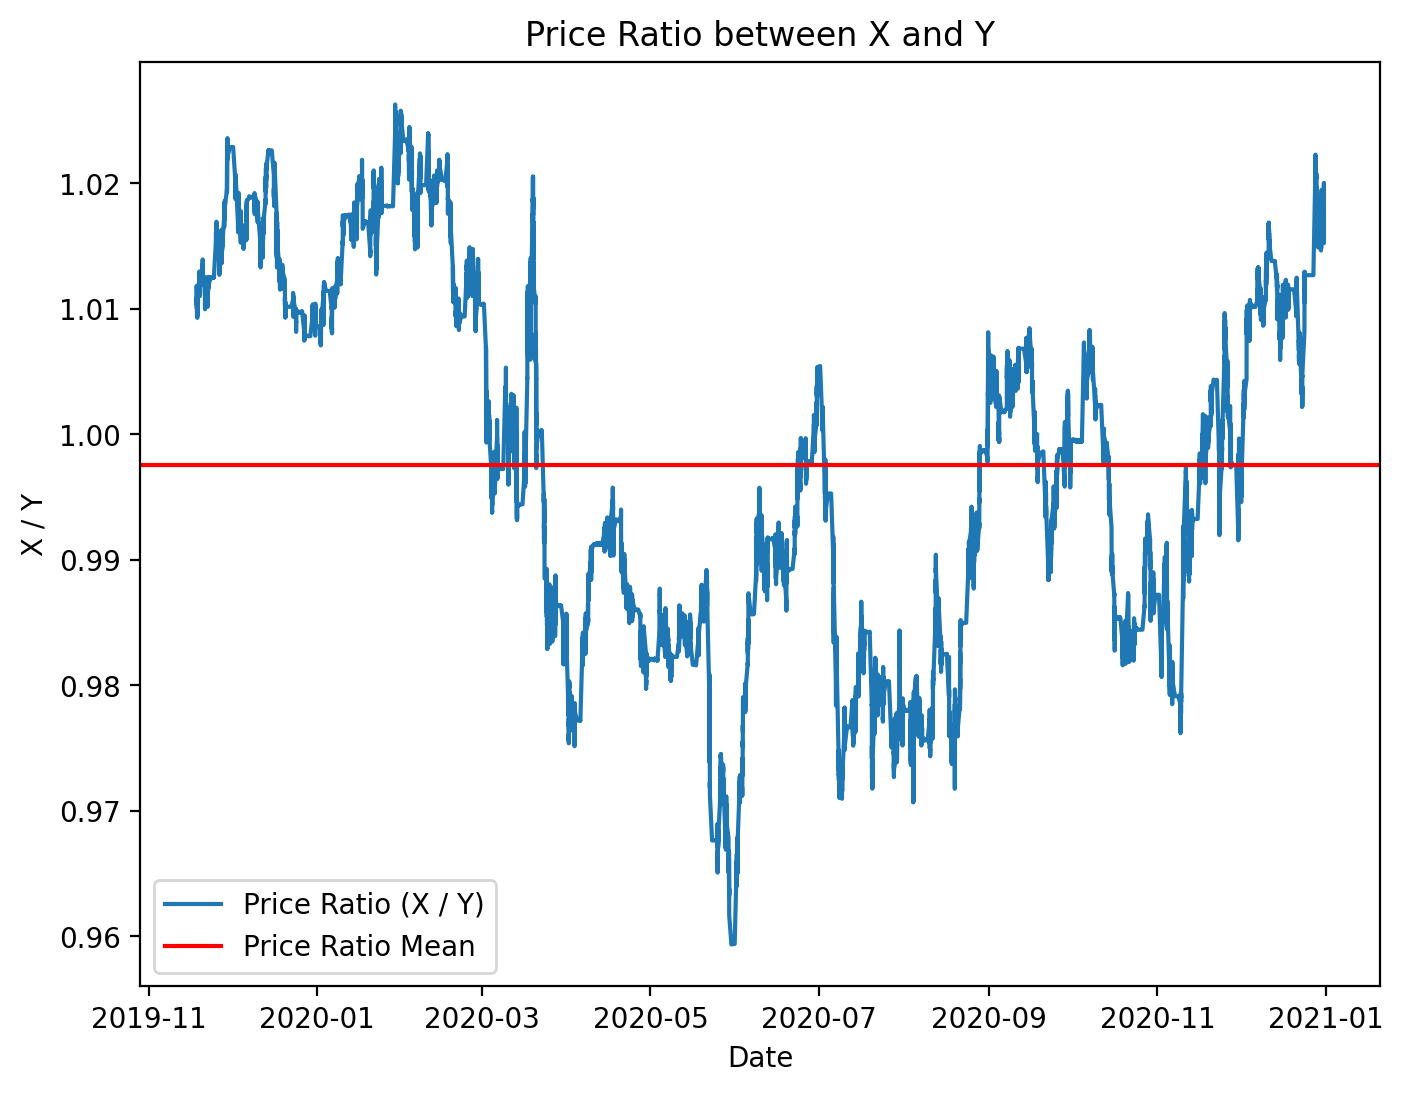

In [27]:
# Imputation
outliers_df = identify_outliers(weighted_df, "X_WEIGHTED")
impute_outliers(weighted_df, "X_WEIGHTED", weighted_df["X_WEIGHTED"].median())
outliers_df = identify_outliers(df, "Y_WEIGHTED")
impute_outliers(df, "Y_WEIGHTED", weighted_df["Y_WEIGHTED"].median())

figure(figsize=(8, 6), dpi=200)
X = weighted_df["X_WEIGHTED"]
Y = weighted_df["Y_WEIGHTED"]
ratio = X / Y
plt.plot(ratio, label = "Price Ratio (X / Y)")
plt.axhline(ratio.mean(), color="red", label="Price Ratio Mean")
plt.legend()
plt.title("Price Ratio between X and Y")
plt.xlabel("Date")
plt.ylabel("X / Y")

## Z-Scores
We add the Z-Scores to the ratio plot to explore potential thresholds for making trades. Looking at the plot below, it seems reasonable to make trades when the price ratio of X to Y diverges past 1 standard deviation.

Text(0, 0.5, 'Z-Score')

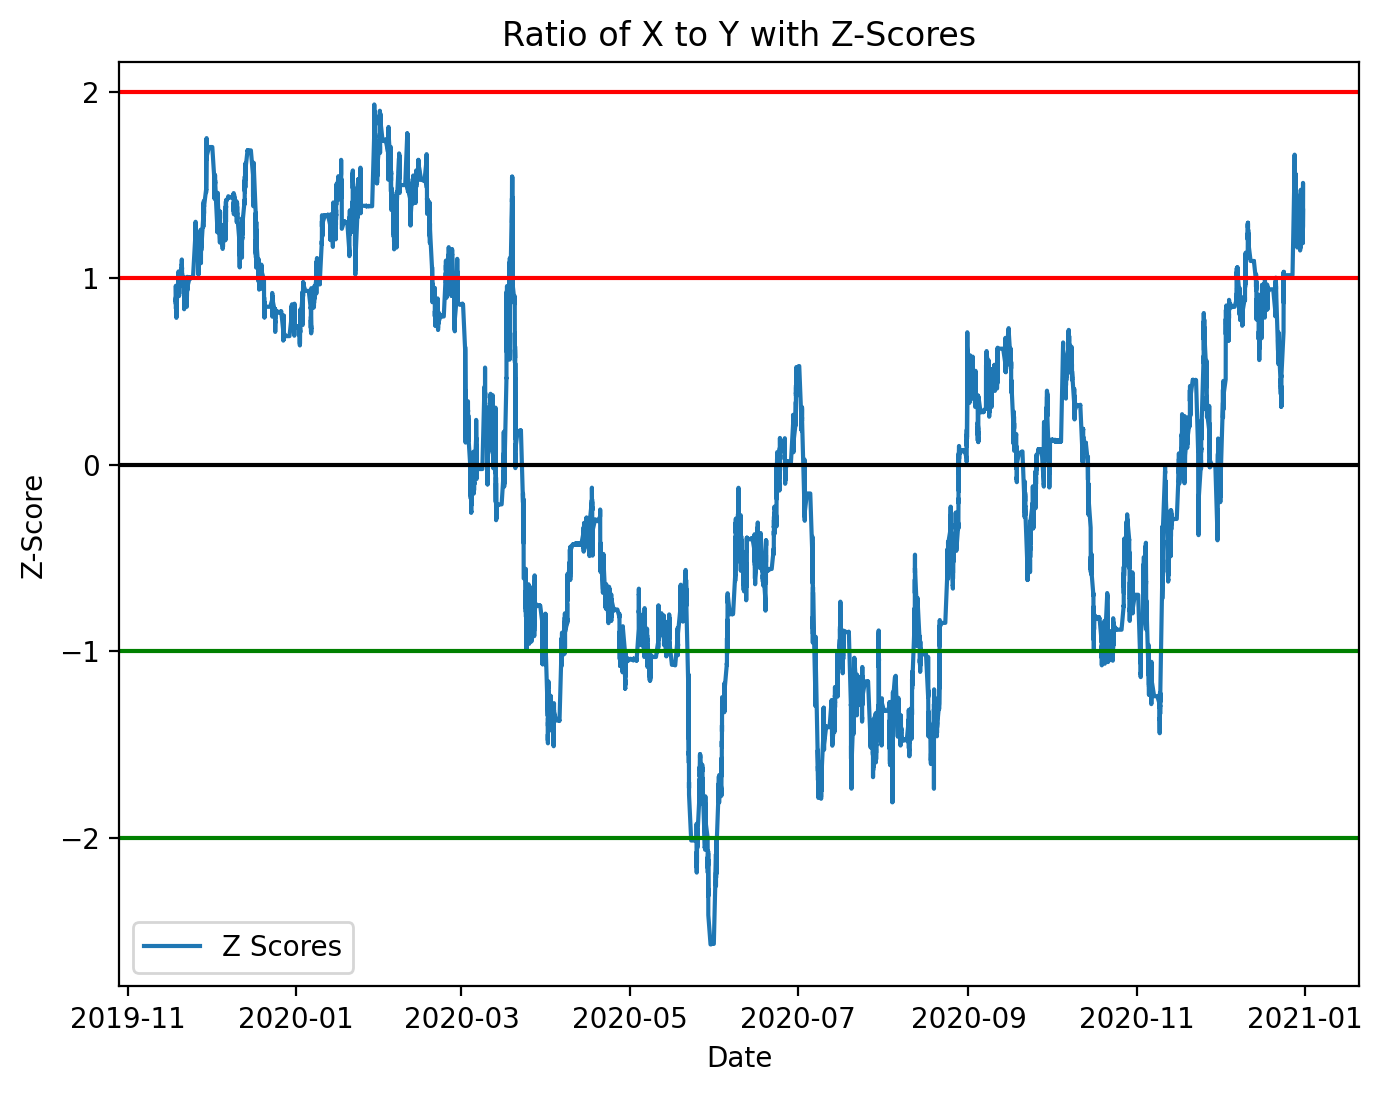

In [28]:
figure(figsize=(8, 6), dpi=200)
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = "black")
plt.axhline(1.0, color="red")
plt.axhline(2, color="red")
plt.axhline(-1.0, color="green")
plt.axhline(-2, color="green")
plt.legend(loc = "best")
plt.title("Ratio of X to Y with Z-Scores")
plt.xlabel("Date")
plt.ylabel("Z-Score")

## Moving Averages
We will use a moving averages model to help find potential entry and exit points within the X and Y price ratio. Moving averages allows us to smooth out the data and identify large deviations in the price ratio. When prices deviate from their historical relationship (such as the spread between X and Y widening or narrowing), we can use the moving averages as a reference point for a fair value within some time window. A price ratio that deviates too far from the local moving average can signal a trading opportunity. In addition, using moving averages can make these predictions a good signal for the future as the mean is constantly changing depending on the time window. If new data is added, we will essentially tag the new data and recalculate the moving average for the new time frame.

Text(0.5, 1.0, 'Ratio between X and Y with 1/4 day and 10 day Moving Averages')

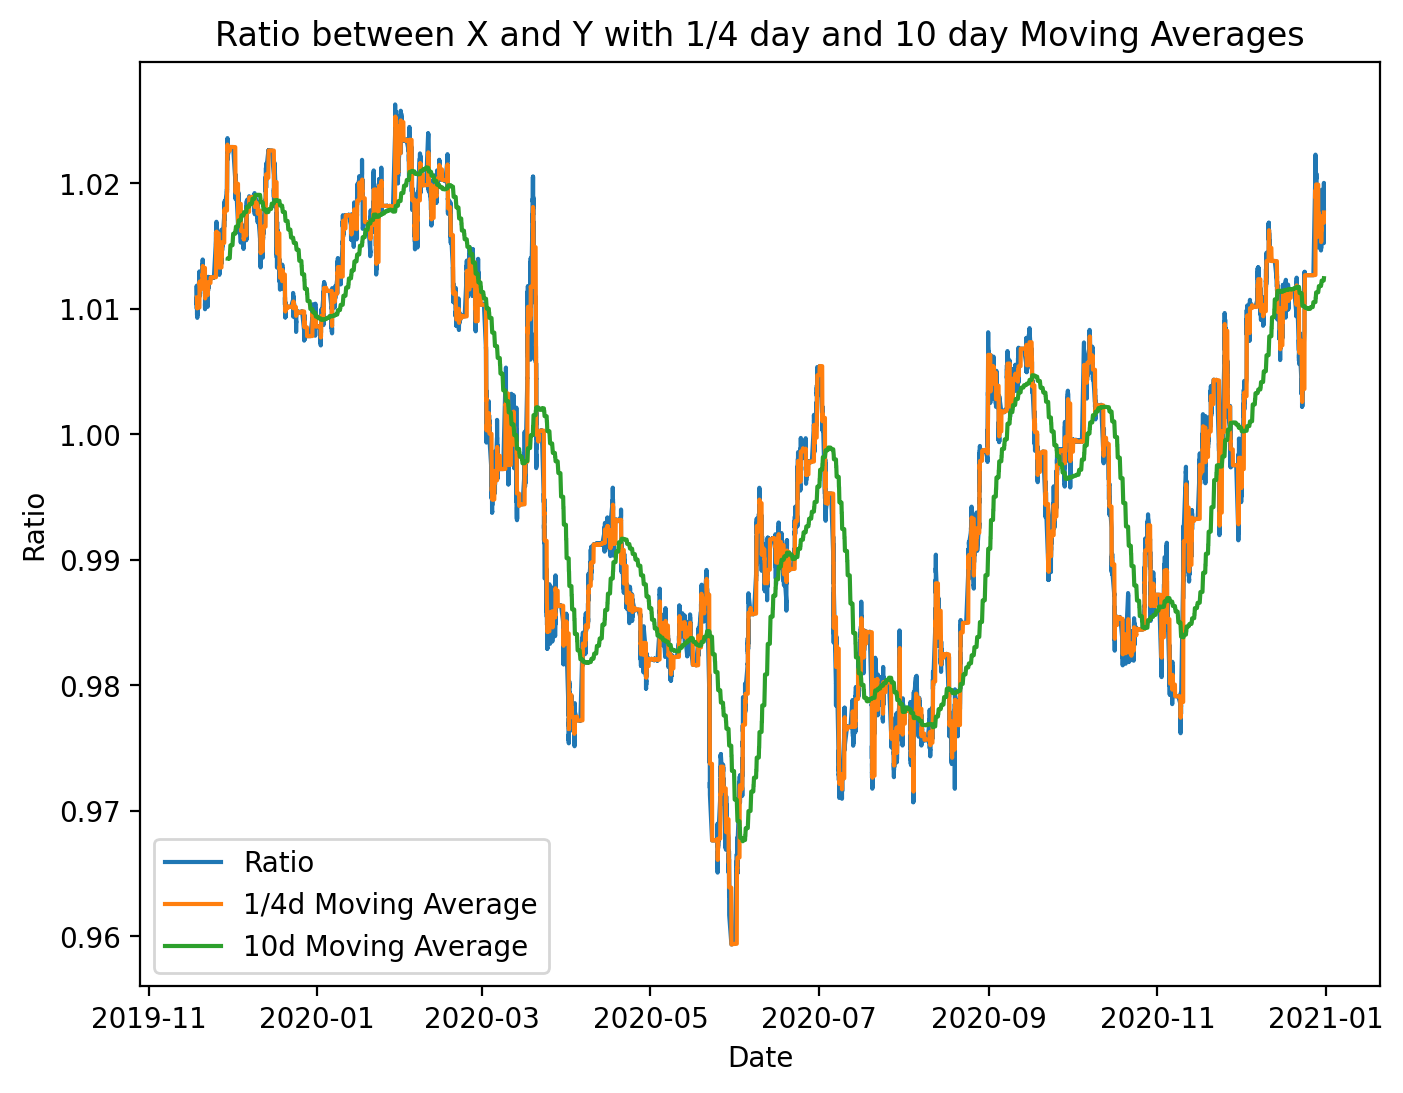

In [29]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg_qrt = ratio.rolling(window=540).mean() # 1/4 day
ratios_mavg_10 = ratio.rolling(window=21600).mean() # 10 day
std = ratio.std()
zscore_10_qrt = (ratios_mavg_qrt - ratios_mavg_10)/std
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg_qrt.index, ratios_mavg_qrt.values)
plt.plot(ratios_mavg_10.index, ratios_mavg_10.values)
plt.legend(["Ratio", "1/4d Moving Average", "10d Moving Average"])
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.title("Ratio between X and Y with 1/4 day and 10 day Moving Averages")

## Rolling Ratio
When the rolling Z-Score lies outside a certain threshold, we aim to make a trade to take advantage of the slight deviations in the price ratio relationship of X and Y.

Text(0.5, 1.0, 'Rolling Ratio of Z-Score')

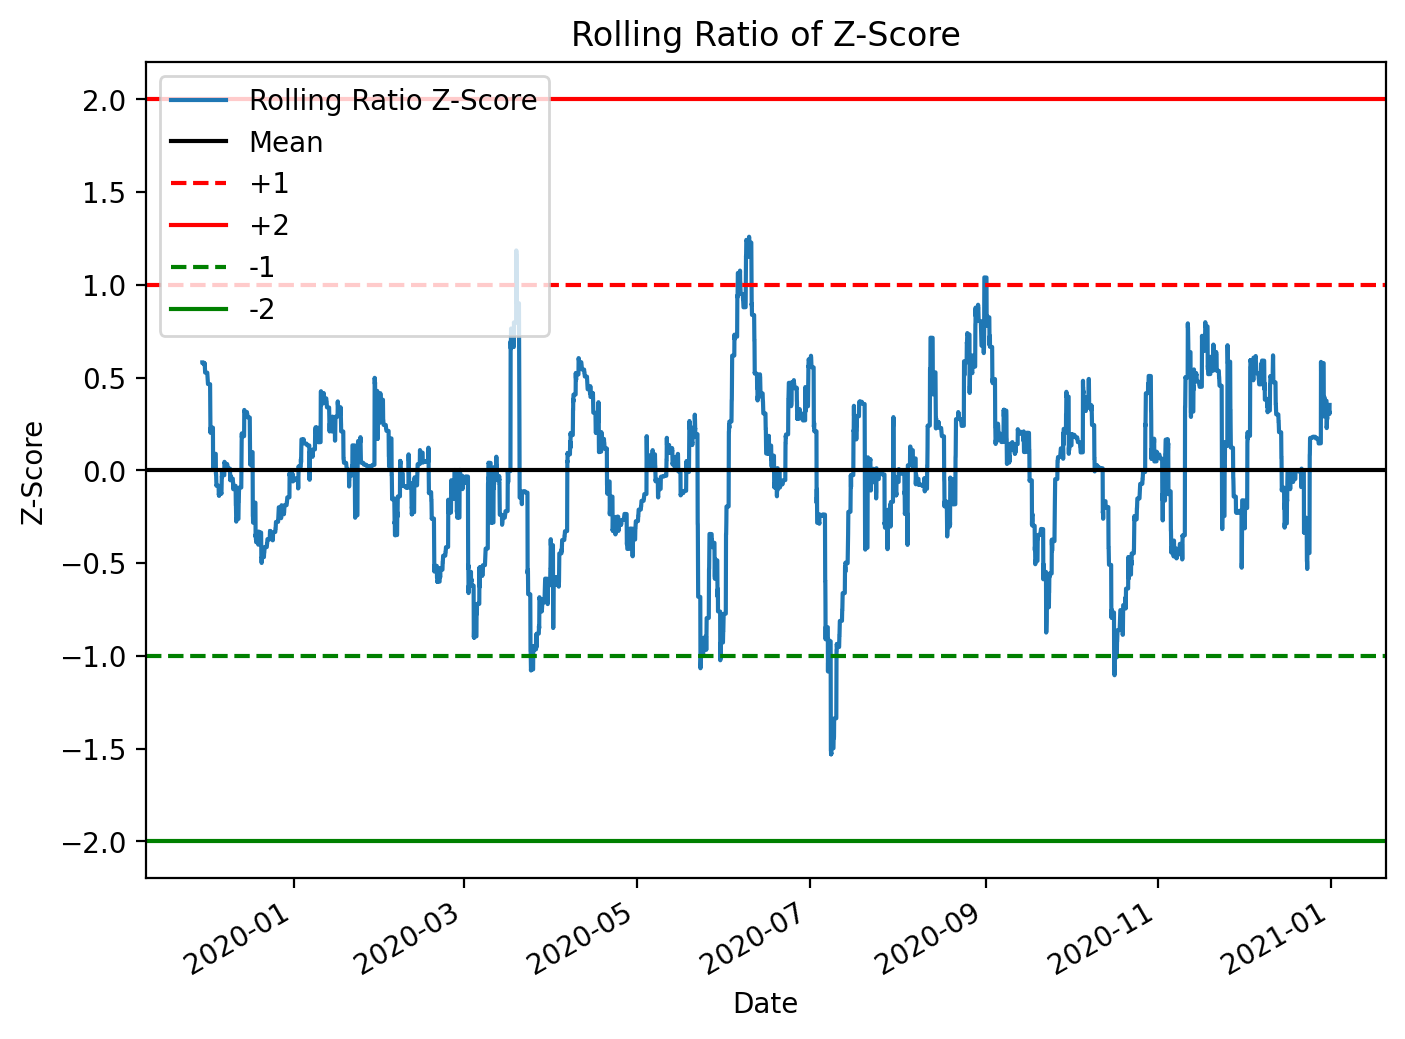

In [30]:
figure(figsize=(8, 6), dpi=200)
zscore_10_qrt.plot()
plt.axhline(0, color="black")
plt.axhline(1, color="red", linestyle="--")
plt.axhline(2, color="red", linestyle="-")
plt.axhline(-1, color="green", linestyle="--")
plt.axhline(-2, color="green", linestyle="-")
plt.legend(["Rolling Ratio Z-Score", "Mean", "+1","+2","-1","-2"])
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.title("Rolling Ratio of Z-Score")

## Ratio of X to Y

Below we plot the price ratio of X to Y using the weighted values of X and Y. The variable "buy" equates to buying X and selling Y while the variable "sell" equates to selling X and buying Y. Our goal, to maximise profits, would likely be going long when the price is undervalued (bullish/expect prices to increase) and short when the price is overvalued (bearish/expect prices to decrease), relative to the other instrument.

Text(0, 0.5, 'X / Y')

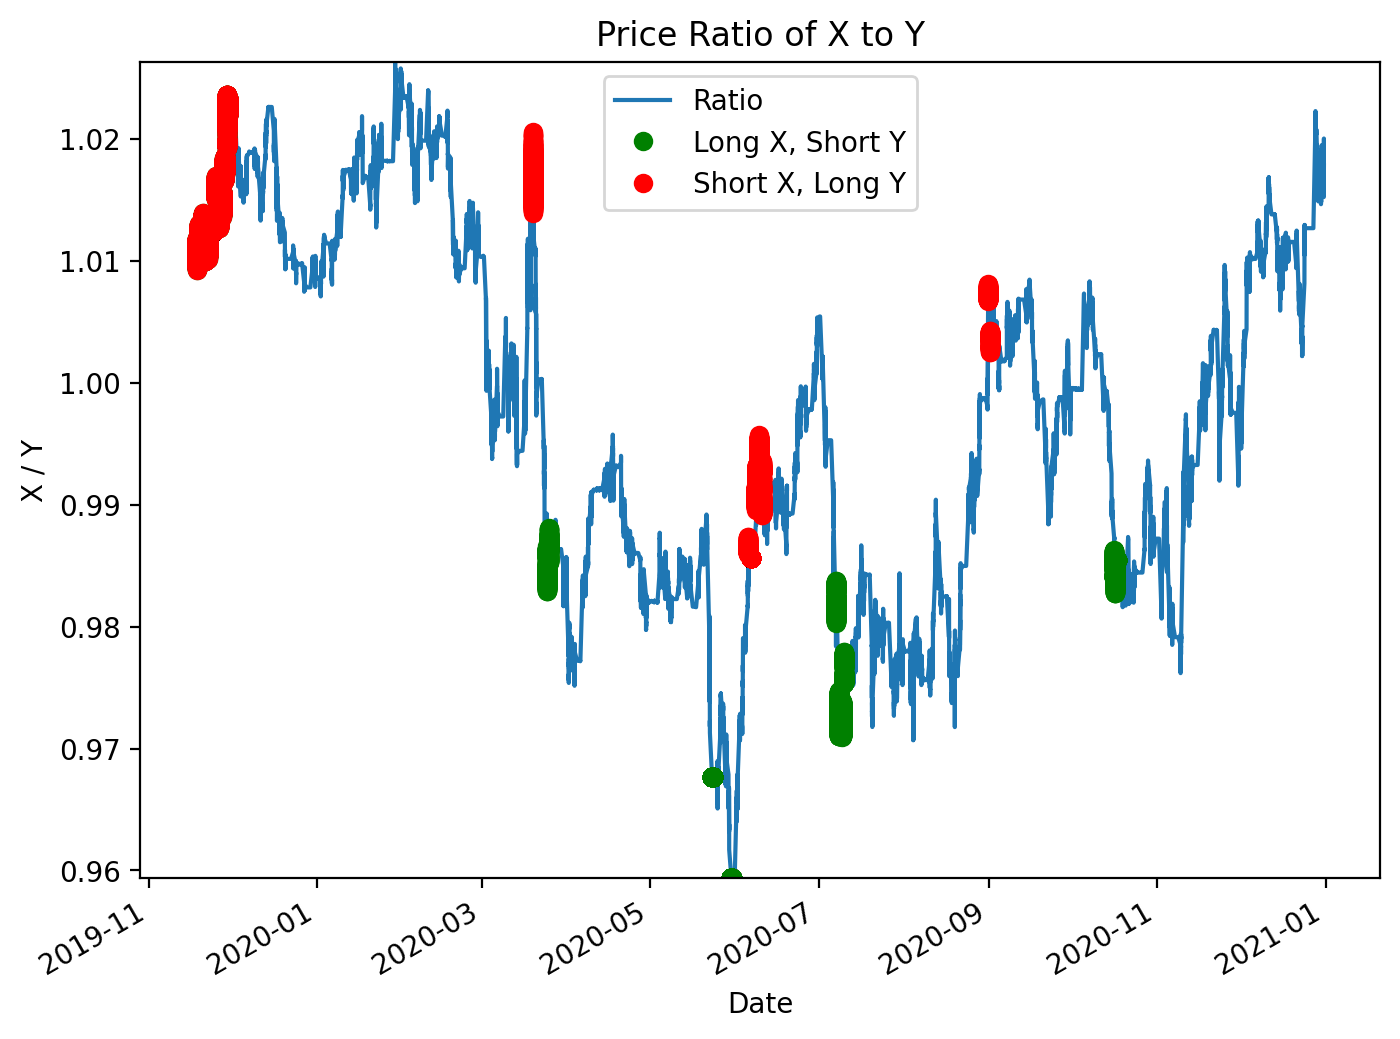

In [31]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_10_qrt>-1] = 0
sell[zscore_10_qrt<1] = 0
buy.plot(color="green", linestyle="None", marker="o")
sell.plot(color="red", linestyle="None", marker="o")
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(["Ratio", "Long X, Short Y", "Short X, Long Y"])
plt.title("Price Ratio of X to Y")
plt.xlabel("Date")
plt.ylabel("X / Y")

## Oppotunitiy

We see that there is potential to make money as the moving averages have identified points of time where the prices diverge past 1 standard deviation. As such, when the price ratio of X and Y increases past 1 standard deviation, we will want to buy Y and sell X (Z-Score = 1). This is essentially going long on Y and going short on X. We do this based on the assumption of cointegration between X and Y. Since there is a long-term relationship between these two financial instruments, we expect the price ratio to eventually converge. Similarly, if the price ratio of X and Y decreases past 1 standard deviation (Z-Score = -1), we do the opposite. We will buy X and sell Y, hoping that the price of X will increase (long position) and the price of Y to decrease (short position).

## Strategy
To simulate this trading strategy, we will set conditions:
1. Our initial capital will be 1 million dollars (AUD).
2. We will only check/buy/sell at 8am each trading day.
3. When we reach the end of the dataset, we will backtrack from the last day until we can sell all positive positions of X and Y (also checking and selling at 8am).

The strategy used below is inspired by the pairs trading strategy, which is defined as a market-neutral trading strategy that involves simultaneously buying and selling two financial instruments that are highly correlated. It is expected that the long-term relationship between these instruments will continue even through short-term deviations, and that profits can be made by taking advantage of price fluctuations that differ beyond a certain threshold.

The way in which this trading strategy differs to the standard pairs trading strategy defined above goes as follows:
- Instead of selling both financial instruments when the price ratio returns to the mean, we will only sell when the price ratio has shifted 2 standard deviations from the initial purchase of the instrument.
- This brings in more risk since we are betting that the price ratio will favour one instrument and then we can only realise our profits when the price ratio flips and favours the other instrument.
- Although there is increased risk, we are more likely to reap greater rewards when we make a sell as at least one of the two stocks will have increased in value for long positions (and decreased in value for short positions).

## Limitations
- We may not be able to assume financial instruments X and Y are cointegrated since we could only test the middle 50% of the dataset (the interquartile range).
- This may not be able to generalise well to a different dataset, such as one with different trading times.
- We could potentially implement a threshold where we ignore too much of a divergence. Then, we can reset the mean since it may change with new data. The rationale behind this is the chance of the mean of the price ratio changing.
- The profits chart is slightly inaccurate as it includes unrealised profits. Instead of profits, it's more so how much more is our portfolio worth compared to the initial investment at the points where a trade is completed.
- Since we are using moving averages to check whether prices have diverged too far, there is a chance that the earlier data doesn't have enough information to make an informed z-score. As such, the red zone (sell X, buy Y) at the start of the price ratio chart above is not where the first transaction occurs, it is actually the second cluster of red circles.
- These indicators may not be a good indicator of the future because the values of the moving averages (the number of days) were specific to this dataset. Further exploration in tuning these parameters will be beneficial for this trading strategy to work on new data.

In [32]:
# Initialise capital in AUD
initial_capital = 1000000
capital = initial_capital

# Initialise X and Y position
x_position = 0
y_position = 0

# Initialise profit
profit = 0
profit_tracker = []
time_tracker = []

# Threshold for when to buy/sell
z_threshold = 1
buy_fraction = 3/4
sell_fraction = 1/4

# 8am buy/sell, check every 1 trading day
for i in range(0, len(df), 2160):
    # GREEN SIGNAL -> BUY X / SELL Y
    if zscore_10_qrt.iloc[i] < -z_threshold:
        # X and Y allocation based on available capital
        x_allocation = buy_fraction * capital
        y_allocation = sell_fraction * capital

        # Calculate the amount of X to buy based on what we can afford and the current bid volume
        x_to_buy = max(0, min(x_allocation // df["X_ASK"].iloc[i], df["X_ASK_VOL"].iloc[i]))
        
        # Buy X
        x_position += x_to_buy
        df["X_ASK_VOL"].iloc[i] -= x_to_buy
        
        # Calculate the amount of Y to sell based on the current holding and ask volume
        y_to_sell = max(0, min(y_position, df["Y_BID_VOL"].iloc[i]))
        
        # Sell Y
        y_position -= y_to_sell
        df["Y_BID_VOL"].iloc[i] += y_to_sell
        
        # Update capital after buying X and/or selling Y
        capital -= x_to_buy * df["X_ASK"].iloc[i]
        capital += y_to_sell * df["Y_BID"].iloc[i]

        # Profit tracker
        profit_tracker.append(capital + x_position * df["X_ASK"].iloc[i] + y_position * df["Y_ASK"].iloc[i] - initial_capital)
        time_tracker.append(df.iloc[i].name)

    # RED SIGNAL -> SELL X / BUY Y
    elif zscore_10_qrt.iloc[i] > z_threshold:
        # X and Y allocation based on available capital
        x_allocation = sell_fraction * capital
        y_allocation = buy_fraction * capital
        
        # Calculate the amount of X to sell based on the current holding and ask volume
        x_to_sell = max(0, min(x_position, df["X_BID_VOL"].iloc[i]))
        
        # Sell X
        x_position -= x_to_sell
        df["X_BID_VOL"].iloc[i] += x_to_sell
        
        # Calculate the amount of Y to buy based on what we can afford and the current bid volume
        y_to_buy = max(0, min(y_allocation // df["Y_ASK"].iloc[i], df["Y_ASK_VOL"].iloc[i]))
        
        # Buy Y
        y_position += y_to_buy
        df["Y_ASK_VOL"].iloc[i] -= y_to_buy
        
        # Update capital after selling X and/or buying Y
        capital += x_to_sell * df["X_BID"].iloc[i]
        capital -= y_to_buy * df["Y_ASK"].iloc[i]

        # Profit tracker
        profit_tracker.append(capital + x_position * df["X_ASK"].iloc[i] + y_position * df["Y_ASK"].iloc[i] - initial_capital)
        time_tracker.append(df.iloc[i].name)

# 8am sell, checks every 1 trading day (essentially selling what we can)
for i in range(len(df) - 721, -1, -2160):
    # Sell X
    if x_position > 0:
        x_to_sell = max(0, min(x_position, df["X_BID_VOL"].iloc[i]))
        x_position -= x_to_sell
        df["X_BID_VOL"].iloc[i] += x_to_sell
        capital += x_to_sell * df["X_BID"].iloc[i]
    # Sell Y
    if y_position > 0:
        y_to_sell = max(0, min(y_position, df["Y_BID_VOL"].iloc[i]))
        y_position -= y_to_sell
        df["Y_BID_VOL"].iloc[i] += y_to_sell
        capital += y_to_sell * df["Y_BID"].iloc[i]
    # No holdings of X and Y in current portfolio
    if x_position == y_position == 0:
        break

profit_tracker.append(capital - initial_capital)
time_tracker.append(df.iloc[len(df) - 1].name)

print(f"Final Profit: ${capital - initial_capital}")

Final Profit: $211996.0


## Profit
The profit after the 1 million dollar investment is $211,996.0, which is approximately a 21.2% return on investment. Plotted below is the profit of this trading strategy over time. Note that some of the points on the plot are estimates of the profit that were predicted based on unrealised gains. Although a ROI of 20% sounds good, this ROI was reached before 1 year of this trading strategy. This means after the halfway mark, most of the profits had already been realised.

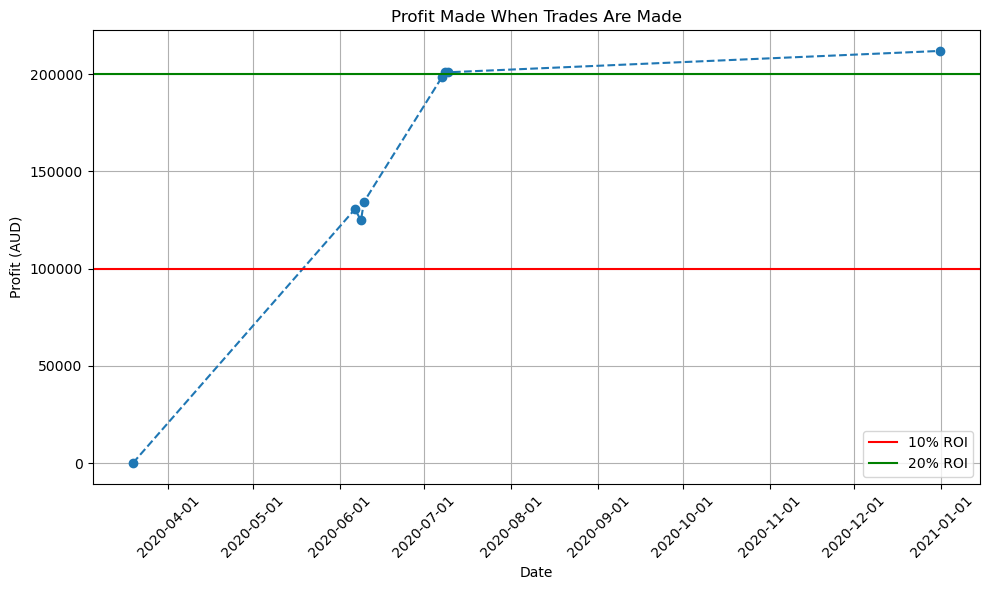

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(time_tracker, profit_tracker, marker="o", linestyle="--")
plt.title("Profit Made When Trades Are Made")
plt.xlabel("Date")
plt.ylabel("Profit (AUD)")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)
plt.axhline(y=100000, color="red", linestyle="-", label="10% ROI")
plt.axhline(y=200000, color="green", linestyle="-", label="20% ROI")
plt.legend()
plt.grid(True)
plt.tight_layout()

## Further Research
- More advanced models could be explored to predict prices of financial instruments. I am interested to explore how LSTMs identify patterns and explore trends to help predict future prices as LSTMs can capture and retain long-term dependencies over time (via memory cells and gating mechanisms), are flexible and adaptable to changing patterns in the data and can handle multivariate time series data by learning the relationships between variables over time. This would yield greater predictive power for future prices, and can also justify buy/sell decisions.
- Implementation of a stop-loss or greater risk management systems so that sudden market volatility or market crashes can be dealt with. We would want this technique to work even through times of great financial instability seeing as these events can not be timed perfectly.
- If given access to more data, we can explore deeper relationships between X and Y. A rough 1 year span of data may be insufficient when trying to learn patterns that span across multiple years or even decades.

## References

- https://github.com/KidQuant/Pairs-Trading-With-Python
- https://github.com/SpencerPao/Quantitative_Strategies
